<a href="https://colab.research.google.com/github/shreyasrajesh0308/Deep_Learning/blob/master/Deep_Learning_Book_Chapter4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Getting Started with Neural Nets, Classification and Regression

## Binary Classification 

### IMDB Data Classification

Restricting number of words in review to 10000

In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
            num_words=10000)

Encoding input data with multi hot encoding to feed into the neural network

In [1]:
import numpy as np 

def vectorize_sequences(sequences, dimensions=10000):

  results = np.zeros((len(sequences), dimensions))

  for i, sequence in enumerate(sequences):

    for j in sequence:

      results[i, j] = 1
    
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

NameError: ignored

In [3]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### Building the Model 

For the case of vector input to scalar output clasification a stack of Dense layers does the job 

In [39]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
  layers.Dense(16, activation = "relu"),
  layers.Dense(16, activation = "relu"),
  layers.Dense(1, activation = "sigmoid")
  ])

In [40]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

Create a Validation set

In [7]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [42]:
y_val.shape

(10000,)

In [43]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 48ms/step - loss: 0.5192 - accuracy: 0.7920 - val_loss: 0.3956 - val_accuracy: 0.8631
Epoch 2/20
30/30 [==============================] - 1s 36ms/step - loss: 0.3121 - accuracy: 0.9015 - val_loss: 0.3051 - val_accuracy: 0.8888
Epoch 3/20
30/30 [==============================] - 1s 35ms/step - loss: 0.2278 - accuracy: 0.9258 - val_loss: 0.2786 - val_accuracy: 0.8909
Epoch 4/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1778 - accuracy: 0.9424 - val_loss: 0.2770 - val_accuracy: 0.8888
Epoch 5/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1469 - accuracy: 0.9517 - val_loss: 0.3028 - val_accuracy: 0.8821
Epoch 6/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1189 - accuracy: 0.9625 - val_loss: 0.2931 - val_accuracy: 0.8861
Epoch 7/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0980 - accuracy: 0.9706 - val_loss: 0.3094 - val_accuracy: 0.8859
Epoch 8/20
30

In [44]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

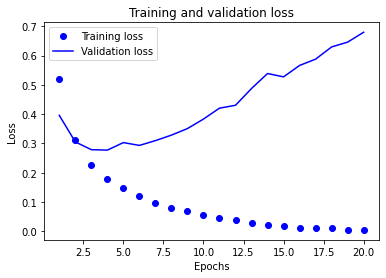

In [45]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss") 
plt.plot(epochs, val_loss_values, "b", label="Validation loss") 
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

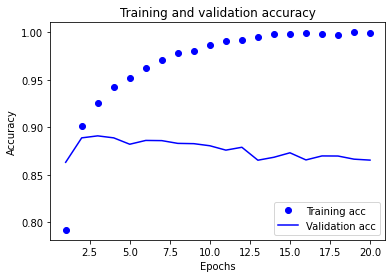

In [46]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

We see a clear case of the validation error increasing while the training error goes on decreasing, this is a classic sign of **overfitting**

We see that the model learnt well until the 4th epoch, hence training until the 4th epoch we have

In [48]:
model = keras.Sequential([
        layers.Dense(16, activation="relu"),
        layers.Dense(16, activation="relu"),
        layers.Dense(1, activation="sigmoid")
        ])

model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)


Epoch 1/4
49/49 [==============================] - 2s 29ms/step - loss: 0.4697 - accuracy: 0.8198
Epoch 2/4
49/49 [==============================] - 1s 28ms/step - loss: 0.2677 - accuracy: 0.9079
Epoch 3/4
49/49 [==============================] - 1s 28ms/step - loss: 0.2055 - accuracy: 0.9286
Epoch 4/4
49/49 [==============================] - 1s 29ms/step - loss: 0.1727 - accuracy: 0.9391


In [49]:
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.2886 - accuracy: 0.8855


### Further Experiments

### Model Architecture with one hidden layer

In [51]:
model = keras.Sequential([
                          layers.Dense(16, activation="relu"),
                          layers.Dense(1, activation="sigmoid")
                          ])
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 48ms/step - loss: 0.5104 - accuracy: 0.8005 - val_loss: 0.4162 - val_accuracy: 0.8450
Epoch 2/20
30/30 [==============================] - 1s 36ms/step - loss: 0.3319 - accuracy: 0.8980 - val_loss: 0.3333 - val_accuracy: 0.8795
Epoch 3/20
30/30 [==============================] - 1s 37ms/step - loss: 0.2575 - accuracy: 0.9239 - val_loss: 0.2942 - val_accuracy: 0.8903
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2117 - accuracy: 0.9363 - val_loss: 0.2809 - val_accuracy: 0.8908
Epoch 5/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1797 - accuracy: 0.9452 - val_loss: 0.2754 - val_accuracy: 0.8889
Epoch 6/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1548 - accuracy: 0.9536 - val_loss: 0.2795 - val_accuracy: 0.8875
Epoch 7/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1366 - accuracy: 0.9617 - val_loss: 0.2770 - val_accuracy: 0.8893
Epoch 8/20
30

Validation error starts shooting up at the 5th epoch

In [4]:
from tensorflow import keras
from tensorflow.keras import layers

In [5]:
model = keras.Sequential([
                          layers.Dense(16, activation="relu"),
                          layers.Dense(1, activation="sigmoid")
                          ])
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])
history = model.fit(x_train, y_train, epochs=5, batch_size=512)

Epoch 1/5
49/49 [==============================] - 2s 30ms/step - loss: 0.4379 - accuracy: 0.8354
Epoch 2/5
49/49 [==============================] - 2s 31ms/step - loss: 0.2755 - accuracy: 0.9068
Epoch 3/5
49/49 [==============================] - 1s 29ms/step - loss: 0.2189 - accuracy: 0.9258
Epoch 4/5
49/49 [==============================] - 1s 29ms/step - loss: 0.1864 - accuracy: 0.9350
Epoch 5/5
49/49 [==============================] - 1s 29ms/step - loss: 0.1641 - accuracy: 0.9438


In [6]:
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.2868 - accuracy: 0.8852


#### Model Architecture with 3 Hidden Layers

In [8]:
model = keras.Sequential([
                          layers.Dense(16, activation="relu"),
                          layers.Dense(16, activation="relu"),
                          layers.Dense(16, activation="relu"),
                          layers.Dense(1, activation="sigmoid")
                          ])

model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 47ms/step - loss: 0.5358 - accuracy: 0.7789 - val_loss: 0.4378 - val_accuracy: 0.8219
Epoch 2/20
30/30 [==============================] - 1s 36ms/step - loss: 0.3106 - accuracy: 0.8993 - val_loss: 0.3076 - val_accuracy: 0.8829
Epoch 3/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2212 - accuracy: 0.9258 - val_loss: 0.2786 - val_accuracy: 0.8919
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1676 - accuracy: 0.9437 - val_loss: 0.2976 - val_accuracy: 0.8826
Epoch 5/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1376 - accuracy: 0.9543 - val_loss: 0.2878 - val_accuracy: 0.8877
Epoch 6/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1095 - accuracy: 0.9645 - val_loss: 0.3030 - val_accuracy: 0.8869
Epoch 7/20
30/30 [==============================] - 1s 37ms/step - loss: 0.0853 - accuracy: 0.9745 - val_loss: 0.3367 - val_accuracy: 0.8837
Epoch 8/20
30

Validation error starts shooting up at the 5th epoch

In [9]:
model = keras.Sequential([
                          layers.Dense(16, activation="relu"),
                          layers.Dense(16, activation="relu"),
                          layers.Dense(16, activation="relu"),
                          layers.Dense(1, activation="sigmoid")
                          ])

model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])
history = model.fit(x_train, y_train, epochs=5, batch_size=512)

Epoch 1/5
49/49 [==============================] - 2s 30ms/step - loss: 0.4660 - accuracy: 0.8150
Epoch 2/5
49/49 [==============================] - 2s 32ms/step - loss: 0.2577 - accuracy: 0.9100
Epoch 3/5
49/49 [==============================] - 1s 29ms/step - loss: 0.1948 - accuracy: 0.9296
Epoch 4/5
49/49 [==============================] - 1s 30ms/step - loss: 0.1637 - accuracy: 0.9415
Epoch 5/5
49/49 [==============================] - 1s 29ms/step - loss: 0.1420 - accuracy: 0.9492


In [10]:
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.3247 - accuracy: 0.8785


## MultiClass Classification

Case of multiple output classes but only one correct class for each input i.e **single-label multiclass classification**.

In [3]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
            num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step


In [4]:
len(train_data), len(test_data)

(8982, 2246)

Again the data is of the same format as the Imdb dataset, hence we use the same vectorize funciton used earlier

In [23]:
import numpy as np 

def vectorize_sequences(sequences, dimensions=10000):

  results = np.zeros((len(sequences), dimensions))

  for i, sequence in enumerate(sequences):

    for j in sequence:

      results[i, j] = 1
    
  return results

In [24]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

Since the labels are integers, we need a way to encode this data appropriately. One way to do this is one hot encoding which uses n values for each label with a one on the only value that is true. Therefore 3 for example would be 

0 0 1 0 0 0 0 0 ...

In [11]:
def to_one_hot(labels, dimension=46):

  results = np.zeros((len(labels), dimension))

  for i, label in enumerate(labels): 
    results[i, label] = 1.
  return results



In [12]:
y_train = to_one_hot(train_labels) 
y_test = to_one_hot(test_labels)

Built in way to do this in Keras

In [13]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [16]:
from tensorflow import keras
from keras import layers

In [18]:
model = keras.Sequential([
                          layers.Dense(64, activation = "relu"),
                          layers.Dense(64, activation = "relu"),
                          layers.Dense(46, activation = "softmax")
                          ])

In [19]:
model.compile(optimizer="rmsprop", loss = "categorical_crossentropy", metrics = ["accuracy"])

Creating a Validation Set for the sample

In [25]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [27]:
history = model.fit(partial_x_train, partial_y_train, epochs = 20, batch_size=512, validation_data = (x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 59ms/step - loss: 2.7220 - accuracy: 0.4970 - val_loss: 1.8120 - val_accuracy: 0.6540
Epoch 2/20
16/16 [==============================] - 1s 44ms/step - loss: 1.4506 - accuracy: 0.7082 - val_loss: 1.3127 - val_accuracy: 0.7090
Epoch 3/20
16/16 [==============================] - 1s 45ms/step - loss: 1.0567 - accuracy: 0.7720 - val_loss: 1.1381 - val_accuracy: 0.7620
Epoch 4/20
16/16 [==============================] - 1s 44ms/step - loss: 0.8269 - accuracy: 0.8218 - val_loss: 1.0388 - val_accuracy: 0.7780
Epoch 5/20
16/16 [==============================] - 1s 44ms/step - loss: 0.6651 - accuracy: 0.8599 - val_loss: 0.9755 - val_accuracy: 0.7950
Epoch 6/20
16/16 [==============================] - 1s 44ms/step - loss: 0.5323 - accuracy: 0.8889 - val_loss: 0.9330 - val_accuracy: 0.8130
Epoch 7/20
16/16 [==============================] - 1s 44ms/step - loss: 0.4282 - accuracy: 0.9117 - val_loss: 0.9098 - val_accuracy: 0.8100
Epoch 8/20
16

Plotting the loss and accuracy curves

In [29]:
import matplotlib.pyplot as plt


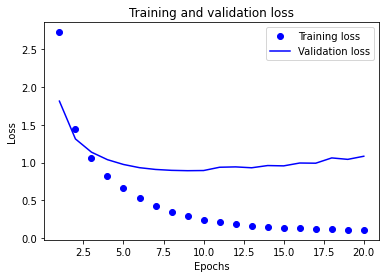

In [30]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

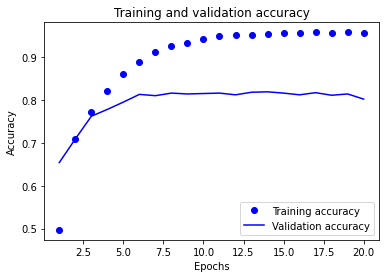

In [31]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


Model starts to overfit after about 9 epochs, training them model on the entire set and validating we have

In [35]:
model = keras.Sequential([
                          layers.Dense(64, activation = "relu"),
                          layers.Dense(64, activation = "relu"),
                          layers.Dense(46, activation = "softmax")
                          ])

model.compile(optimizer="rmsprop", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [36]:
model.fit(x_train, y_train, epochs = 9, batch_size=512)

Epoch 1/9
18/18 [==============================] - 1s 42ms/step - loss: 2.6222 - accuracy: 0.5180
Epoch 2/9
18/18 [==============================] - 1s 41ms/step - loss: 1.3898 - accuracy: 0.7088
Epoch 3/9
18/18 [==============================] - 1s 40ms/step - loss: 1.0282 - accuracy: 0.7794
Epoch 4/9
18/18 [==============================] - 1s 41ms/step - loss: 0.8124 - accuracy: 0.8253
Epoch 5/9
18/18 [==============================] - 1s 40ms/step - loss: 0.6486 - accuracy: 0.8626
Epoch 6/9
18/18 [==============================] - 1s 40ms/step - loss: 0.5178 - accuracy: 0.8913
Epoch 7/9
18/18 [==============================] - 1s 39ms/step - loss: 0.4216 - accuracy: 0.9143
Epoch 8/9
18/18 [==============================] - 1s 41ms/step - loss: 0.3441 - accuracy: 0.9260
Epoch 9/9
18/18 [==============================] - 1s 40ms/step - loss: 0.2877 - accuracy: 0.9378


In [37]:
model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 3ms/step - loss: 0.9357 - accuracy: 0.7992


[0.9356927275657654, 0.799198567867279]

Instead of using one hot encoding for the labels we could just use the integers as outputs but we would need to change the loss function. Hence we would have 

In [38]:
y_train = np.asarray(train_labels)
y_test = np.asarray(test_labels)

In [39]:
model = keras.Sequential([
                          layers.Dense(64, activation = "relu"),
                          layers.Dense(64, activation = "relu"),
                          layers.Dense(46, activation = "softmax")
                          ])

model.compile(optimizer="rmsprop", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [40]:
model.fit(x_train, y_train, epochs = 9, batch_size=512)

Epoch 1/9
18/18 [==============================] - 1s 45ms/step - loss: 2.6254 - accuracy: 0.5490
Epoch 2/9
18/18 [==============================] - 1s 42ms/step - loss: 1.3808 - accuracy: 0.7153
Epoch 3/9
18/18 [==============================] - 1s 43ms/step - loss: 1.0022 - accuracy: 0.7892
Epoch 4/9
18/18 [==============================] - 1s 42ms/step - loss: 0.7811 - accuracy: 0.8370
Epoch 5/9
18/18 [==============================] - 1s 41ms/step - loss: 0.6208 - accuracy: 0.8719
Epoch 6/9
18/18 [==============================] - 1s 42ms/step - loss: 0.4948 - accuracy: 0.8961
Epoch 7/9
18/18 [==============================] - 1s 41ms/step - loss: 0.4045 - accuracy: 0.9159
Epoch 8/9
18/18 [==============================] - 1s 43ms/step - loss: 0.3280 - accuracy: 0.9305
Epoch 9/9
18/18 [==============================] - 1s 42ms/step - loss: 0.2721 - accuracy: 0.9397


In [41]:
model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 3ms/step - loss: 0.9580 - accuracy: 0.7939


[0.9579580426216125, 0.7938557267189026]

Now, if the model sizes are not chosen appropriately enough, then there could be an information bottleneck. Here we have an output that is 46 dimensional, hence picking an intermediate dimension with far fewer dimensions would be detremental since there would be significant loss of information 

In [42]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 2s 21ms/step - loss: 2.8963 - accuracy: 0.3829 - val_loss: 2.2482 - val_accuracy: 0.4190
Epoch 2/20
63/63 [==============================] - 1s 17ms/step - loss: 1.8057 - accuracy: 0.5610 - val_loss: 1.6031 - val_accuracy: 0.6440
Epoch 3/20
63/63 [==============================] - 1s 16ms/step - loss: 1.3398 - accuracy: 0.6720 - val_loss: 1.4221 - val_accuracy: 0.6460
Epoch 4/20
63/63 [==============================] - 1s 17ms/step - loss: 1.1532 - accuracy: 0.6926 - val_loss: 1.3284 - val_accuracy: 0.6700
Epoch 5/20
63/63 [==============================] - 1s 17ms/step - loss: 1.0390 - accuracy: 0.7249 - val_loss: 1.3173 - val_accuracy: 0.6920
Epoch 6/20
63/63 [==============================] - 1s 17ms/step - loss: 0.9505 - accuracy: 0.7503 - val_loss: 1.2884 - val_accuracy: 0.7020
Epoch 7/20
63/63 [==============================] - 1s 17ms/step - loss: 0.8761 - accuracy: 0.7695 - val_loss: 1.3116 - val_accuracy: 0.7000
Epoch 8/20
63

We clearly see the drop in accuraxy in the validation set wrt out old model, this is because the information bottleneck has resulted in not being able to represent everything from the 64 dimensional space in the 4 dimensional space leading to a loss of information when expanding back to a 46 dimensional output space.

## Regression